In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from bs4 import BeautifulSoup

# Featurization of textual data
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import os
from sklearn.manifold import TSNE

# Model selection
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Better metric for judging multilabel classification solution
from sklearn.metrics import f1_score,log_loss,confusion_matrix

# Pretrained word2vec models
from gensim.models import Word2Vec,KeyedVectors
import spacy

# For multiclass/multilabel training
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

# tqdm is used to print the progrss bar
from tqdm import tqdm

stop_words = ["able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","no-one","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","et-al","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","'ve","vol","vols","wed","whats","wheres","whim","whod","whos","widely","words","world","youd","youre"]

In [3]:
df = pd.read_csv("trainLabels.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      10868 non-null  object
 1   Class   10868 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 169.9+ KB


In [4]:
df.head()

,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1


In [5]:
# Example of .byte code available

example_hex_code = [i[:-1] for i in open('train\\0A32eTdBKayjCWhZqDOQ.bytes','r')]
(example_hex_code[0:10])

['00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08',
 '00401010 BB 42 00 8B C6 5E C2 04 00 CC CC CC CC CC CC CC',
 '00401020 C7 01 08 BB 42 00 E9 26 1C 00 00 CC CC CC CC CC',
 '00401030 56 8B F1 C7 06 08 BB 42 00 E8 13 1C 00 00 F6 44',
 '00401040 24 08 01 74 09 56 E8 6C 1E 00 00 83 C4 04 8B C6',
 '00401050 5E C2 04 00 CC CC CC CC CC CC CC CC CC CC CC CC',
 '00401060 8B 44 24 08 8A 08 8B 54 24 04 88 0A C3 CC CC CC',
 '00401070 8B 44 24 04 8D 50 01 8A 08 40 84 C9 75 F9 2B C2',
 '00401080 C3 CC CC CC CC CC CC CC CC CC CC CC CC CC CC CC',
 '00401090 8B 44 24 10 8B 4C 24 0C 8B 54 24 08 56 8B 74 24']

<BarContainer object of 9 artists>

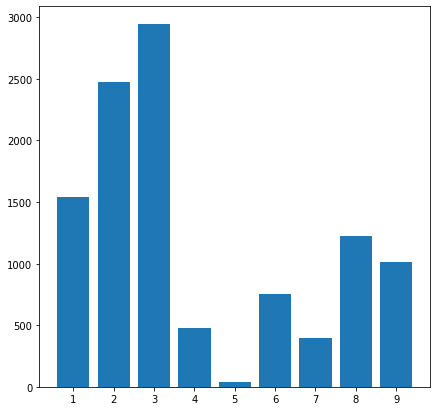

In [6]:
# EDA on class types

plt.figure(figsize=(7,7))
plt.bar(['1','2','3','4','5','6','7','8','9'],list(df.groupby('Class').count().Id))

<h1> Feature Extraction </h1>

In [8]:
# Using file size in MB as a feature

(os.path.getsize('train\\0A32eTdBKayjCWhZqDOQ.bytes')/(2**20))

4.154254913330078

In [9]:
df['byte_file_size'] = df['Id'].apply(lambda file_name : (os.path.getsize('train\\'+file_name+'.bytes')/(2**20)))

In [10]:
df.head()

,Id,Class,byte_file_size
0,01kcPWA9K2BOxQeS5Rju,1,0.679688
1,04EjIdbPV5e1XroFOpiN,1,0.849609
2,05EeG39MTRrI6VY21DPd,1,0.509766
3,05rJTUWYAKNegBk2wE8X,1,2.789551
4,0AnoOZDNbPXIr2MRBSCJ,1,0.566406


<AxesSubplot:xlabel='Class', ylabel='byte_file_size'>

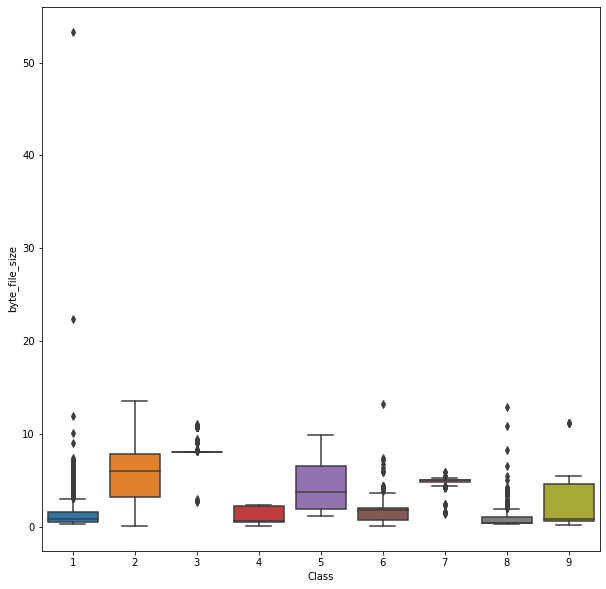

In [11]:
# byte_file_size is a potentially useful feature

plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Class',y='byte_file_size')

In [12]:
# Hexadecimal pair ie "AB","11","22" as a potenial feature

example_hex_code = [i[:-1] for i in open('train\\0A32eTdBKayjCWhZqDOQ.bytes','r')]
(example_hex_code[0:10])

['00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08',
 '00401010 BB 42 00 8B C6 5E C2 04 00 CC CC CC CC CC CC CC',
 '00401020 C7 01 08 BB 42 00 E9 26 1C 00 00 CC CC CC CC CC',
 '00401030 56 8B F1 C7 06 08 BB 42 00 E8 13 1C 00 00 F6 44',
 '00401040 24 08 01 74 09 56 E8 6C 1E 00 00 83 C4 04 8B C6',
 '00401050 5E C2 04 00 CC CC CC CC CC CC CC CC CC CC CC CC',
 '00401060 8B 44 24 08 8A 08 8B 54 24 04 88 0A C3 CC CC CC',
 '00401070 8B 44 24 04 8D 50 01 8A 08 40 84 C9 75 F9 2B C2',
 '00401080 C3 CC CC CC CC CC CC CC CC CC CC CC CC CC CC CC',
 '00401090 8B 44 24 10 8B 4C 24 0C 8B 54 24 08 56 8B 74 24']

In [13]:
# Stripping address as not relevant

def strip_address(text):
    return text[9:]

strip_address(example_hex_code[0])

'56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08'

In [14]:
comb = []
for i in ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']:
    for j in ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']:
    
        comb.append(i+j)
df['??'] = 0
comb.append('??')

C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+j] = 0
C:\Users\palas\AppData\Local\Temp\ipykernel_10884\3316920836.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

In [16]:
# Feature Extraction

features = np.zeros((10868,257))
token_dict = dict(zip(comb,np.arange(0,258,1)))


for i in tqdm(range(len(df))):
    for text in open('train\\'+df['Id'].iloc[i]+'.bytes','r'):
        temp_tokens = (strip_address(text)[:-1]).split(' ')
        for token in (temp_tokens):
            if(len(token)<2) : continue
            else : features[i][token_dict[token]] += 1

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [2:45:45<00:00,  1.09it/s]


In [32]:
# Normalizing Data

n = Normalizer()
df_new = pd.concat([df,pd.DataFrame(n.fit_transform(features))],axis=1)

In [41]:
# Seperating features and labels

X = df_new.drop(['Id','Class'],axis = 1)
y = df_new['Class']

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


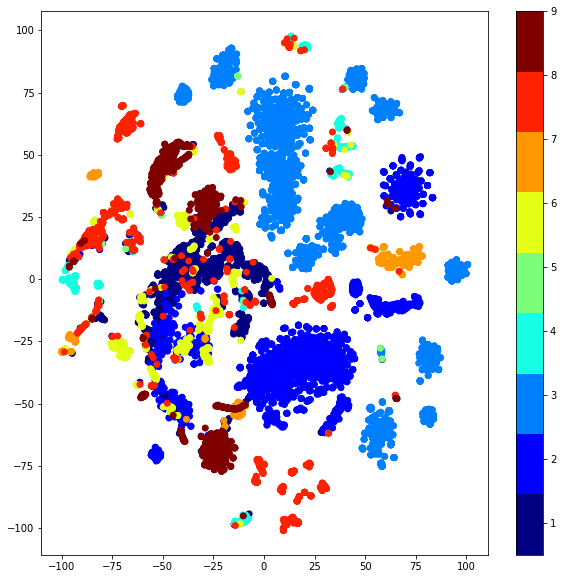

In [44]:
# Performed dimesionality reduction (tSNE) to reduce 256 to 2 features for plotting scatter plots. Clustering indicates
# good features.

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(X)
vis_x = results[:, 0]
vis_y = results[:, 1]

plt.figure(figsize=(10,10))
plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


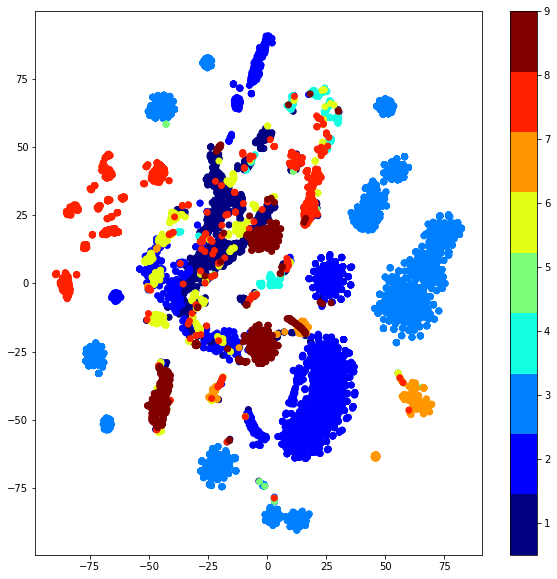

In [45]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(X)
vis_x = results[:, 0]
vis_y = results[:, 1]

plt.figure(figsize=(10,10))
plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


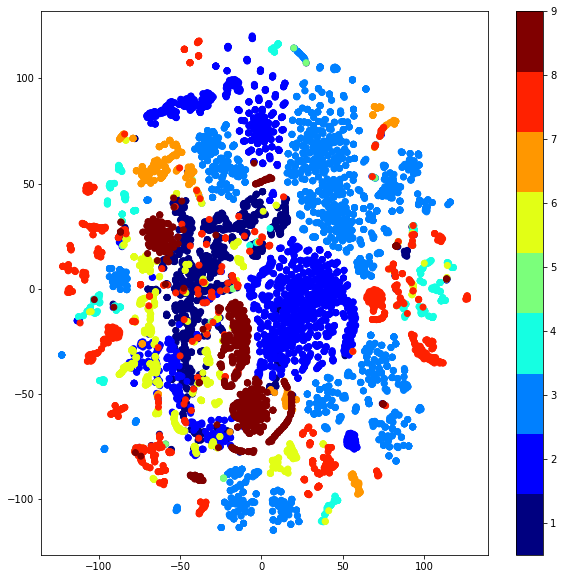

In [46]:
xtsne=TSNE(perplexity=10)
results=xtsne.fit_transform(X)
vis_x = results[:, 0]
vis_y = results[:, 1]

plt.figure(figsize=(10,10))
plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<p> It is safe to conclude that current features are sufficiently useful (ByteFile) </p>

<h1> Model Training </h1>

In [120]:
x_train,x_test,y_train,y_test = train_test_split(X,y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8151, 258)
(8151,)
(2717, 258)
(2717,)


<h2> KNN </h2>

In [74]:
# Alpha : Nearest Neighbor parameter.

alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(x_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    cv_log_error_array.append(log_loss(y_test, predict_y, labels=k_cfl.classes_, eps=1e-15))
    print("{} loss at {} neighbors".format(log_loss(y_test, predict_y, labels=k_cfl.classes_, eps=1e-15),i))

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

0.2501385541141689 loss at 1 neighbors


c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

0.23469318716548504 loss at 3 neighbors


c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

0.2578654192344874 loss at 5 neighbors


c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

0.27508708068555293 loss at 7 neighbors


c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

0.28596718547674116 loss at 9 neighbors


c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

0.2951993351404933 loss at 11 neighbors


c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

0.30459974917019966 loss at 13 neighbors


<AxesSubplot:>

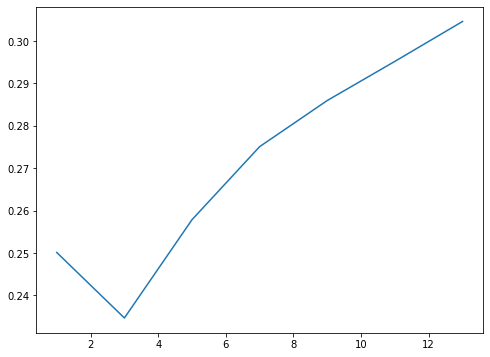

In [77]:
# Least loss observed at 3 neighbors

plt.figure(figsize=(8,6))
sns.lineplot(x=[x for x in range(1, 15, 2)],y=cv_log_error_array)

<AxesSubplot:>

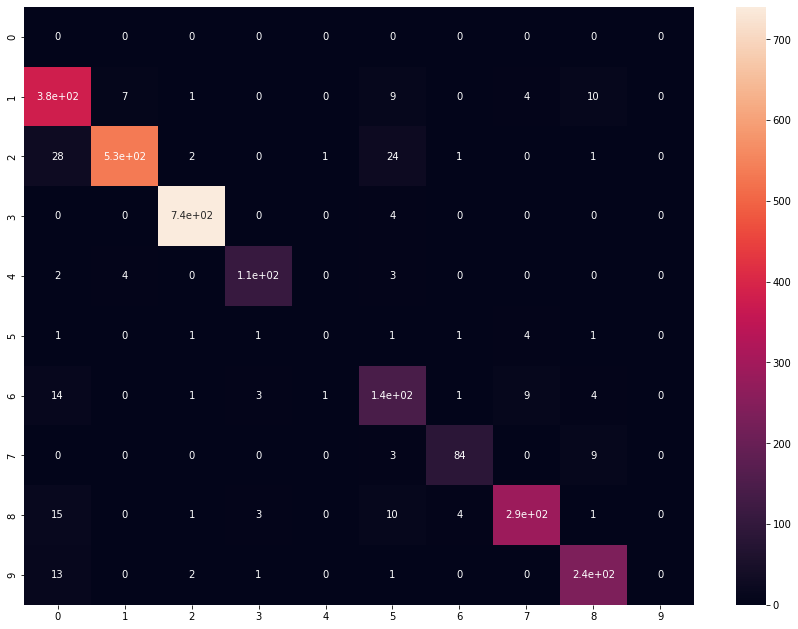

In [102]:
plt.figure(figsize=(15,11))
sns.heatmap(confusion_matrix(y_test,list(map(np.argmax,predict_y))),annot=True)

<h2> Logistic Regression </h2>

In [105]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(x_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    cv_log_error_array.append(log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got featu

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. o

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got featu

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got featu

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got featu

<AxesSubplot:>

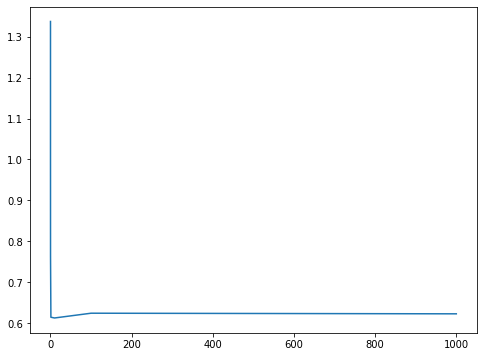

In [107]:
plt.figure(figsize=(8,6))
sns.lineplot(x=[10 ** x for x in range(-5, 4)],y=cv_log_error_array)

<AxesSubplot:>

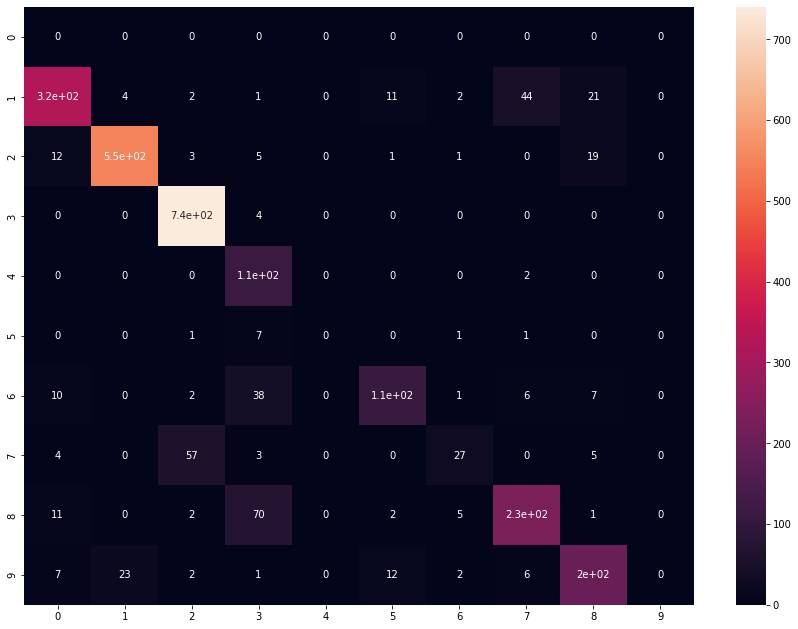

In [108]:
plt.figure(figsize=(15,11))
sns.heatmap(confusion_matrix(y_test,list(map(np.argmax,predict_y))),annot=True)

<h1> Random Forest Classifier </h1>

In [115]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]


for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(x_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    cv_log_error_array.append(log_loss(y_test, predict_y, labels=r_cfl.classes_, eps=1e-15))
    

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\palas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feat

log_loss for c =  10 is 0.11949288667079119
log_loss for c =  50 is 0.10894971275873193
log_loss for c =  100 is 0.10951091505245264
log_loss for c =  500 is 0.1087822422538674
log_loss for c =  1000 is 0.10912929969191253
log_loss for c =  2000 is 0.10847894483380355
log_loss for c =  3000 is 0.10815906963728575


<AxesSubplot:>

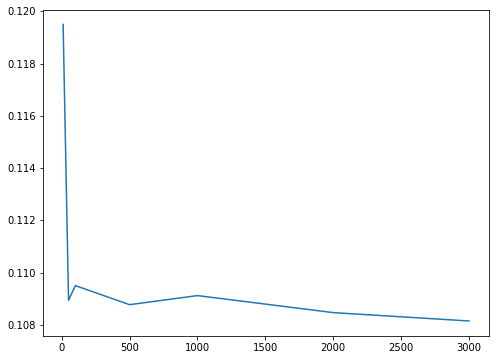

In [116]:
plt.figure(figsize=(8,6))
sns.lineplot(x=[10,50,100,500,1000,2000,3000],y=cv_log_error_array)

<AxesSubplot:>

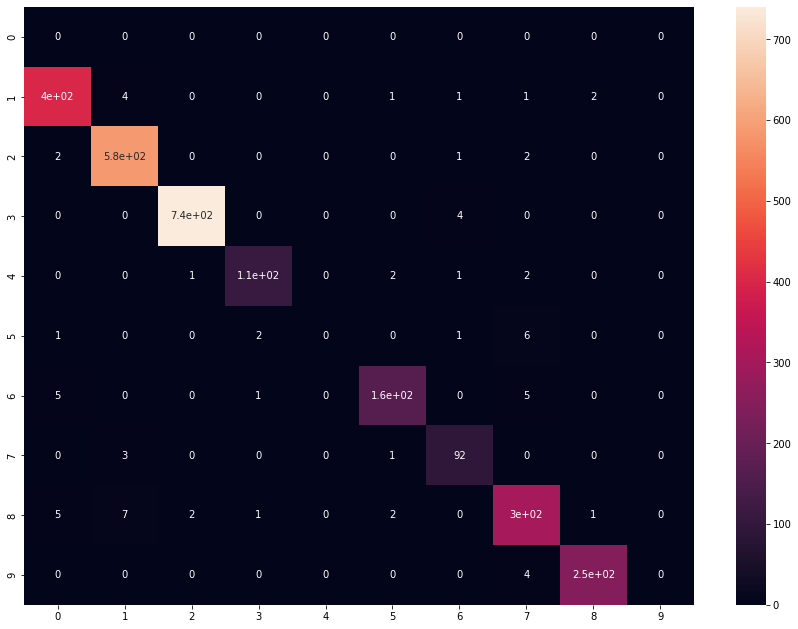

In [117]:
plt.figure(figsize=(15,11))
sns.heatmap(confusion_matrix(y_test,list(map(np.argmax,predict_y))),annot=True)

<h1> XGBClassifier </h1>

In [1]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(x_train,y_train)

In [126]:
# Finding best parameters and using it to train the model 
# print (random_cfl1.best_params_)

x_cfl=XGBClassifier(n_estimators=1000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(x_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(x_train,y_train)

predict_y = c_cfl.predict_proba(x_train)
print ('train loss',log_loss(y_train, predict_y))

predict_y = c_cfl.predict_proba(x_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.022717230934666845
test loss 0.0796059409379608
